In [1]:
library(ggplot2) # newer package that does nice plots
library(survival)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
g = read.csv("final.csv")

In [3]:
head(g)

id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2,NA,416
2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4,1,648
3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3,1,466
4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5,1,441
5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2,1,371
6,0,47,89,1,0,0,0,0,0,...,0,1,3,0,0,0,0,3,NA,47


In [4]:
gender <- as.factor(g[,"gender"]) # R calls categorical variables factors
fu_time <- g[,"fu_time"] # continuous variable (numeric) 
death <- g[,"death"] # binary variable (numeric) 

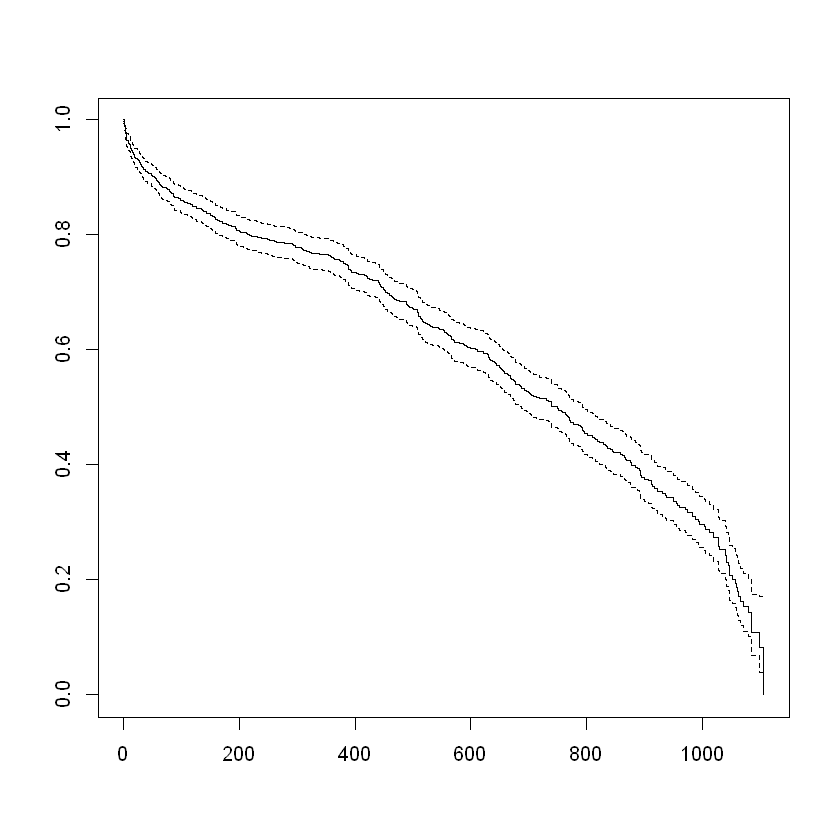

In [5]:
km_fit <- survfit(Surv(fu_time, death) ~ 1)

plot(km_fit)

In [6]:
summary(km_fit, times = c(1:7,30,60,90*(1:10)))

Call: survfit(formula = Surv(fu_time, death) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    992      12    0.988 0.00346        0.981        0.995
    2    973       7    0.981 0.00435        0.972        0.989
    3    963       5    0.976 0.00489        0.966        0.985
    4    954       6    0.970 0.00546        0.959        0.980
    5    945       5    0.964 0.00590        0.953        0.976
    6    938       1    0.963 0.00598        0.952        0.975
    7    933       1    0.962 0.00606        0.951        0.974
   30    865      39    0.921 0.00865        0.905        0.939
   60    809      28    0.891 0.01010        0.871        0.911
   90    770      24    0.864 0.01117        0.843        0.887
  180    698      43    0.815 0.01282        0.790        0.841
  270    653      24    0.787 0.01363        0.760        0.814
  360    619      21    0.761 0.01428        0.733        0.789
  450    525      44    0.705 0.01554        0.675   

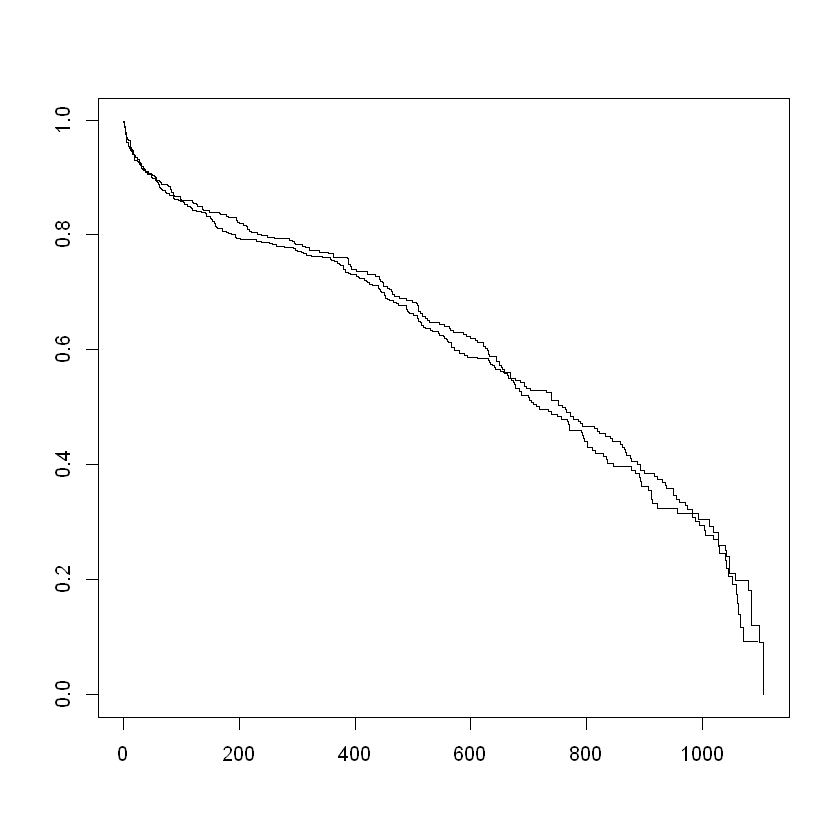

In [7]:
km_gender_fit <- survfit(Surv(fu_time, death) ~ gender) 

plot(km_gender_fit)

In [8]:
survdiff(Surv(fu_time, death) ~ gender, rho=0) 

Call:
survdiff(formula = Surv(fu_time, death) ~ gender, rho = 0)

           N Observed Expected (O-E)^2/E (O-E)^2/V
gender=1 548      268      271    0.0365     0.082
gender=2 452      224      221    0.0448     0.082

 Chisq= 0.1  on 1 degrees of freedom, p= 0.8 